# Data visualistation with matplotlib


## 1. Import matplotlib modules

In [1]:
import matplotlib

Matplotlib has many different backends, usually its fine to stick to the default. But sometimes it is necessary to change the backend (before importing the plotting module ```pyplot```). The full list of available backends reads:

[u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']

In [2]:
matplotlib.use('MacOSX')

When working from within a jupyter notebook, we can choose *matplotlib* backend with a magic function

In [3]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'webagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [4]:
%matplotlib inline
#% matplotlib notebook

Now, we import ```pyplot``` the main plotting module of *matplotlib*

In [5]:
import matplotlib.pyplot as plt

## 2. The default plot

Let's create some data (normal distribution)

In [6]:
import numpy as np
data = np.random.normal(loc=5., scale=2., size=(10000,))

and plot a simple histogram of our data

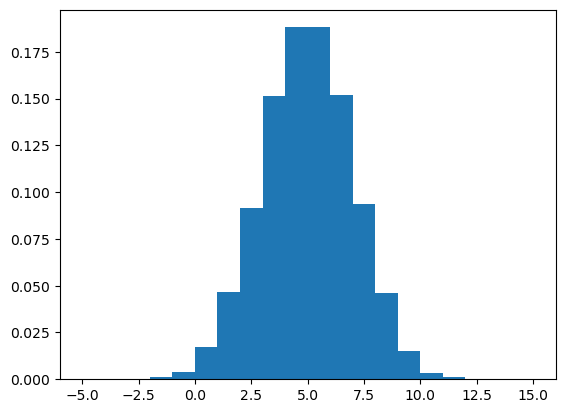

In [7]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
#ax.hist(data, range=(-5,15), bins=20)
plt.show()

## 3. Adding more to the plot

First, we are going to fit a Gaussian profile to our function

In [8]:
from scipy.stats import norm
mu,sigma = norm.fit(data)

and plot it on top of our histogram

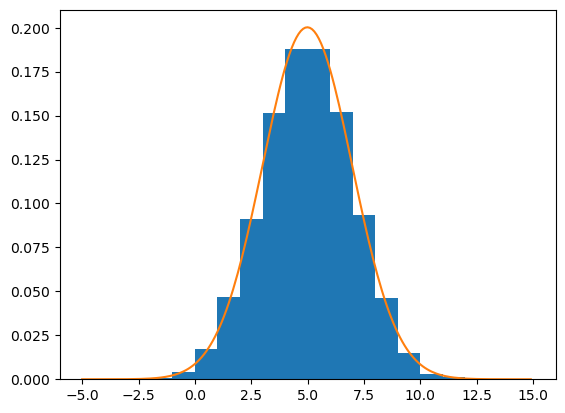

In [9]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(data, range=(-5,15), bins=20, density=True)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma))
plt.show()

let's make a bit easier to read (colors, legends, axis lables, etc..)

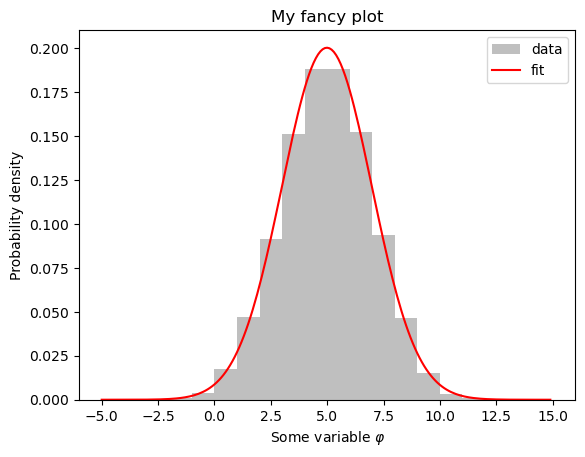

In [10]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.set_ylabel(r'Probability density')
ax.legend(loc=1)
plt.show()

## 4. More changes to the plot

Our plot looks already quite good, but some of the features don't give any extra information so why not removing them

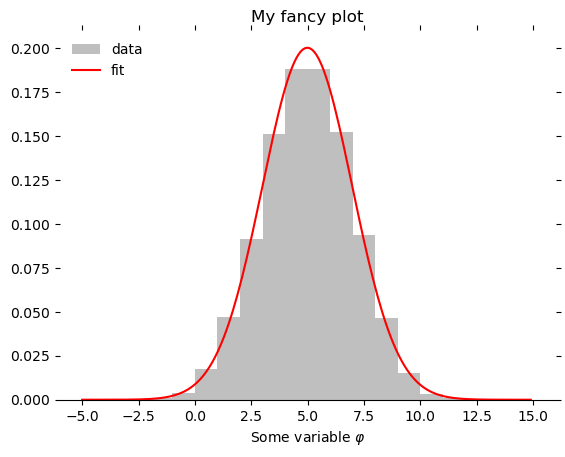

In [11]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
plt.show()

## 5. Saving the plot as a PDF

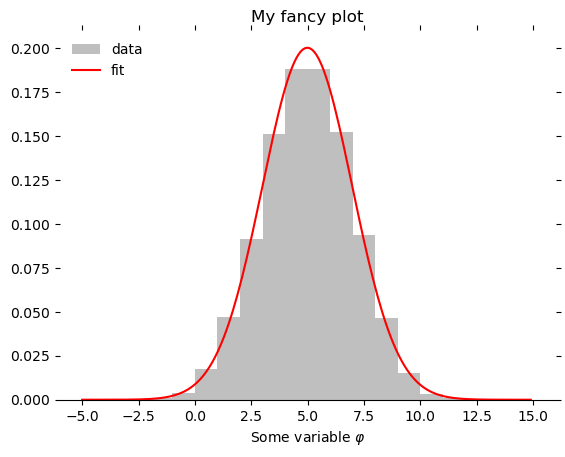

In [12]:
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('My fancy plot')
ax.hist(data, range=(-5,15), bins=20, density=True, label='data', color='0.75', lw=0.2)
ax.plot(np.arange(-5,15,0.1),norm.pdf(np.arange(-5,15,0.1),mu,sigma), label='fit', color='r')
ax.set_xlabel(r'Some variable $\varphi$')
ax.legend(loc=2, frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom='on', top='off')
ax.tick_params(axis='y', which='both', left='off', right='off', labelleft='off')
fig.savefig('my_fancy_plot.pdf', format='pdf', bbox_inches='tight')

In [13]:
## 6. My own data

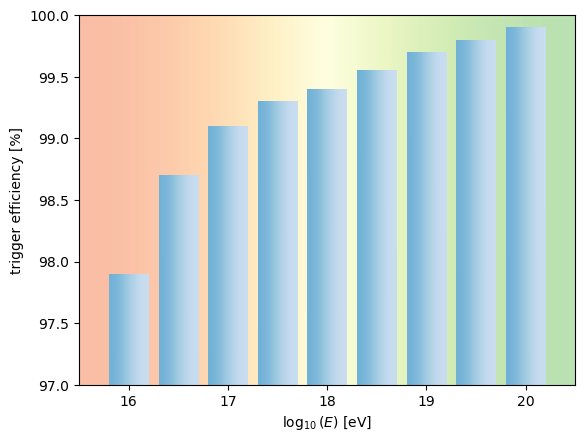

In [14]:
np.random.seed(19680801)


def gradient_image(ax, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


fig, ax = plt.subplots()
ax.set(xlim=(15.5, 20.5), ylim=(97, 100))

# background image
gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

x = np.arange(16, 20.5, 0.5)-0.2
y = np.array([97.9, 98.7, 99.1, 99.3, 99.4, 99.55,99.7, 99.8, 99.9])

gradient_bar(ax, x, y, width=0.4)

plt.ylabel('trigger efficiency [%]')
plt.xlabel('$\log_{10}(E)$ [eV]')
plt.show()

[7 5 4 ... 1 6 5]


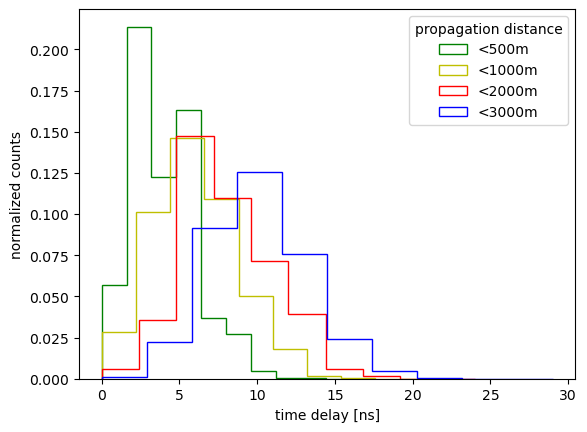

In [37]:

x1 = np.random.poisson(4, 1000000)
x2 = np.random.poisson(6, 1000000)
x3 = np.random.poisson(8, 1000000)
x4 = np.random.poisson(10, 1000000)

print(x)

plt.hist(x1, 10, histtype='step', density=True, fill=False, color='g', label='<500m')
plt.hist(x2, 10, histtype='step', density=True, fill=False, color='y', label='<1000m')
plt.hist(x3, 10, histtype='step', density=True, fill=False, color='r', label='<2000m')
plt.hist(x4, 10, histtype='step', density=True, fill=False, color='b', label='<3000m')
plt.ylabel('normalized counts')
plt.xlabel('time delay [ns]')
plt.legend(title="propagation distance")
plt.show()

In [57]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

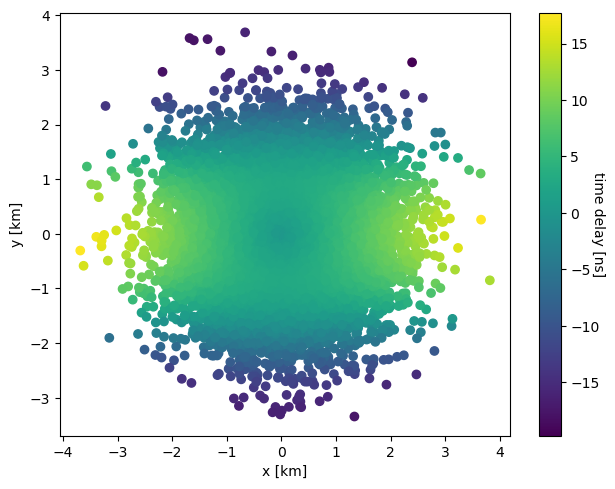

In [81]:
N = 100000
N = 10000


x = np.random.normal(loc=0.0, scale=1.0, size=N)
y = np.random.normal(loc=0.0, scale=1.0, size=N)

r = np.sqrt(x**2 + y**2)*5 * np.cos(-y)

# depict illustration
fig = plt.figure()
ax = fig.add_subplot()
sc = ax.scatter(x, y, c=r)
 
# square plot
ax.set_aspect('equal', adjustable='box')

cbar = plt.colorbar(sc)
cbar.set_label('time delay [ns]', rotation=270)

plt.tight_layout()
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.show()